<a href="https://colab.research.google.com/github/mcd-unison/material-programacion/blob/main/intro-numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="100">
</p>



# Curso Propedéutico en *Programación*

## Introducción a `numpy` y `matplotlib`


<p> Julio Waissman Vilanova </p>
<p>
<img src="https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg" width="200">
</p>
</center>



## Iniciando una libreta de `jupyter`

Para inicializar la libreta siempre es saludable (como en la mayoría de los lenguajes de programación) poner al principio las biblotecas (modulos en python), así como los comandos al sistema y de ser posible la descarga de datos.

En este caso vamos a practicar y aprender el uso de los modulos `numpy` y `matplotlib`.

Tambien vamos a utilizar un comando *mágico* para decirle donde queremos los gráficos de `matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Para insertar las gráficas dentro del entorno
%matplotlib inline

Recuerda que hay que ejecutar cada celda (cell) con *ctrl-enter* o con el simbolo de ejecutar. Un número que indica el orden en que se han ido ejecutando las celdas se va apareciendo. Fijate que si la ejecutas varias veces, el número se incrementa. 

Un grave problema de diseño de las libretas `jupyter`que siempre molesta (con razón) a los ingenieros de software, es que el orden de las celdas no es mandatorio. Es muy importante conocer la secuencia en que uno ejecutó las celdas, si no, el resultado puede ser inesperado para uno. Veremos unos ejemplos.

La primer linea es un comando conocidos como *comandos mágicos*. En este comando le especificamos a la libreta que vamos a utilizar `matplotlib` para hacer gráficas y que queremos que las anexe dentro del documento. 

Si quieres que tu documentación sea atractiva se puede utilizar [estas características de `markdown` que funcionan en las libretas de colab](https://colab.research.google.com/notebooks/markdown_guide.ipynb).


## Pequeños trucos en `jupyter` y colab 

En `jupyter` hay varios trucos que facilitan la vida como desarrolladores, vamos a ver unos pocos. Primero y antes que nada, como obtener ayuda sobre una función y autocompletado.

El autocompletado se obtiene con la tecla `TAB`. Una vez que la función, método o clase se encuentra completa, se puede consultar su documentación en linea. Para eso se utilizan la combinación `SHIFT` + `TAB`. Si se realiza una sola vez, Jupyter presenta solo los argumentos, dos veces, se extiende a una pequeña presentación (en cuadro) de los argumentos, tres veces, da una versión más detallada, y 4 veces, lo presenta en un marco independiente, para tener la documentación a la mano mientras se implementa la función.

Sin embargo, en colab las cosas no funcionan igual. Dentro de colab, el autocompletado se realiza en forma automática, y si quiere uno la documentación, se inicia con paréntesis abierto, como si se fuera a aplicar una función o a inicializar un objeto. Entonces empieza la documentación en un *tooltip*. Si es la celda activa, poner el cursor sobre un comando o clase nos da la documentación básica de éste.Otra manera de obtener la documentación, es usando el comando mñagico `?`.

Vamos a experimentar con la primer función que vamos a utilizar en este tutorial:

In [ ]:
np.array

En Jupyter existen varias funciones que se llaman *mágicas* las cuales empiezan siempre con %. La más común es `%matplotlib inline` para realizar gráficas dentro de la libreta y no que las genere en forma independiente. Otras muy usadas son %time Para calcular el tiempo que tarda en ejecitarse una celda, y %prun para hacer profile de la celda. 

Por ejemplo

In [4]:
%time sum([x for x in range(100000)])

CPU times: user 5.07 ms, sys: 660 µs, total: 5.73 ms
Wall time: 5.76 ms


4999950000

In [5]:
%prun sum([x for x in range(100000)])

         5 function calls in 0.006 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004    0.004    0.004 <string>:1(<listcomp>)
        1    0.001    0.001    0.006    0.006 <string>:1(<module>)
        1    0.001    0.001    0.001    0.001 {built-in method builtins.sum}
        1    0.000    0.000    0.006    0.006 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

En general los comandos mágicos se pueden consultar con otro comando mágico

In [ ]:
%quickref

Existen muchos comandos mágicos, algunos muy útiles que vamos a ir viendo sobre la marcha. Para una explicacion mas completa vamos a darnos una vueltacita [a esta libreta](https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/language/IPythonMagic.ipynb).

## Inicializando variables en `numpy`

`numpy` agrega a python básicamente dos nuevos tipos o clases, de los cuales solo nos vamos a interesar por los arreglos multidimensionales o `ndarray`. La manera más sencilla de crear un array (vector o matriz) es utilizando `array` como:

In [13]:
# Crea un objeto vector
vector_a = np.array([1, 3.1416, 40, 0, 2, 5])
print("vector a = " )
print(vector_a)

# Crea una matriz
matriz_A = np.array([[1, 2], [3, 4], [5, 6]])
print("matriz A = ") 
print(matriz_A)

type(matriz_A)

vector a = 
[ 1.      3.1416 40.      0.      2.      5.    ]
matriz A = 
[[1 2]
 [3 4]
 [5 6]]


numpy.ndarray

Esta es la manera más directa pero no la única (y en muchos casos la mas usada) para crear nuevos vectores multidimensionales. Existen otras maneras de generar arreglos como son las funciones:

* `arange(ini=0, fin, inc=1)`: Devuelve un ndarray iniciando en `ini` y terminando en `fin`, con incrementos de inc

* `zeros(dim)`: Devuelve un ndarray de dimensión `dim` (si es un escalar se considera un vector, si es una tupla de números entonces son las dimensiones del ndarray), con todas sus entradas en cero. 
      
* `ones(dim)`: Similar a `zeros()` pero con unos.
    
* `eye(x, y=none)`: si solo se tiene el argumento `x` devuelve una matriz identidad de $x \times x$. Si se encuentra `y`, entonces una matriz diagonal rectangular de dimensión x por y.
      
* `zeros_like(x)`: Un ndarray de ceros de la misma dimensión que `x` (igual existe `ones_like`).
    
* `linspace(inicial, final, elementos)`: Devuelve un ndarray de una dimensión iniciando en inicial, hasta final de 
manera que existan elementos numeros igualmente espaciados. Muy útil para graficación principalmente.
      
* `random.rand(dim1, dim2, ...)`: Devuelve un ndarray de dimensiones `dim1` por `dim2` por ... con números aleatorios
generados por una distribución uniforme entre 0 y 1. 
      
Veamos unos cuantos ejemplos:

In [14]:
vZ = np.zeros(5)
print("Un vector de ceros con 5 valores")
print(vZ)

Un vector de ceros con 5 valores
[0. 0. 0. 0. 0.]


In [15]:
mO = np.ones((3, 10))
print("Una matriz de 3 x 10 de puron unos")
print(mO)

Una matriz de 3 x 10 de puron unos
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [16]:
va = np.arange(10)
print("va = ", va)

va =  [0 1 2 3 4 5 6 7 8 9]


In [17]:
vb = np.arange(20,-10,-5)
print(f"vb = {vb}")

vb = [20 15 10  5  0 -5]


In [18]:
print("Una matriz de ceros de las dimensiones de mO:")
print(np.zeros_like(mO))

Una matriz de ceros de las dimensiones de mO:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
mA = np.random.rand(5, 12)
print("Y una matriz con números aleatorios bajo una distribución uniforme entre 0 y 1")
print(mA)

Y una matriz con números aleatorios bajo una distribución uniforme entre 0 y 1
[[0.70546503 0.84629259 0.56914221 0.89231156 0.28421098 0.92425821
  0.62190985 0.48105323 0.64502706 0.46582425 0.97783192 0.60569407]
 [0.42127529 0.366277   0.28635204 0.33903515 0.3942662  0.97457168
  0.57290175 0.76601305 0.15456079 0.03819364 0.5004391  0.60019835]
 [0.94443762 0.22015267 0.53997989 0.97800531 0.37620985 0.10725025
  0.45802741 0.63826421 0.02539678 0.24019    0.54792772 0.14362938]
 [0.11914737 0.98718794 0.07524534 0.18983246 0.62363579 0.31785069
  0.00690999 0.88243031 0.44025178 0.87487639 0.78955196 0.26603001]
 [0.9982162  0.10048883 0.97661181 0.73442578 0.35803841 0.3411865
  0.37584521 0.11458722 0.52309181 0.39936423 0.12247973 0.48527244]]


### Vamos a practicar

En la siguiente celda (o puedes crear las que consideres convenientes) crea las siguientes matrices:

* Una matriz de 4 por 6 con valores aleatorios de acuerdo a una distribución normal con media cero y varianza unitaria.
    
* Un vector de 10 elementos con valores aleatorios de números enteros entre 4 y 100
    
* Una matriz diagonal de 5 por 5 cuyos elementos de la diagonal sean (1, 2, 3, 4, 5)

In [ ]:
# Introduce aqui tus respuestas

#Recuerda probar con el autocompletado de las celdas, así como la documentación en linea

## Operaciones básicas de los ndarray

La mayoría de las operaciones que se pueden aplicar en los `ndarray`
 se encuenran en el espacio de nombres de np, y las cuales son bastante directas tal como:

    b = np.sin(a)

la cual devuelve en b un ndarray de las mismas dimensiones que a, cuyas entradas son el seno de las entradas de a (en radianes).
Así, parece inecesario explicar las funciones cos, tan, tanh, acos, asin, etc..

Otras funciones muy útiles no son tan directas. Veamos algunas:

    c = a + b

es la suma de dos ndarray, bastante obvio, lo que no lo es tanto es:

    c = a * b

la cual es un ndarray resultante de la *multiplicación punto a punto* de los elementos de a y b, asumiendo que ambos tienen
las mismas dimensiones. ¿Y para aplicar un producto matricial? Pues se utiliza el comando dot (o producto punto) el cual puede ser
expresado de tres formas:

    c = np.dot(a, b)
    c = a.dot(b)
    c = a @ b

La suma de los elementos de un ndarray tambien es un método del objeto (como min, max, argmin, argmax, etc...)

    b = a.sum()

es la suma de *todos los elementos del array* mientras que

    b = a.sum(axis=0) 

es un ndarray con una dimensión menos que a, con la suma de las columnas. Veamos unos ejemplos:

In [22]:


# Vamos a generar varios ndarrays
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.random.rand(2, 3)

print("a = ")
print(a)

print("b = ")
print(b)

print("Suma de todos los números de b")
print(b.sum())
print(np.sum(b))

print("Media de cada columna de a")
print(a.mean(axis=0))
print(np.mean(a, axis=0))

print("Transpuesta de a")
print(a.transpose())
print(a.T)

print("10 * b = ")
print(10 * b)

print("a * b =")
print(a * b)

print("2 elevado a la matriz a")
print(np.power(2, a))

print("a elevada al cuadrado (elemento a elemento)")
print(np.power(a, 2))

print("Producto punto de a con b transpuesta")
print(a.dot(b.T))
print(np.dot(a, b.T))
print(a @ b.T)

a = 
[[1 2 3]
 [4 5 6]]
b = 
[[0.3422698  0.15226111 0.69419583]
 [0.00288783 0.11577924 0.49812107]]
Suma de todos los números de b
1.805514889401104
1.805514889401104
Media de cada columna de a
[2.5 3.5 4.5]
[2.5 3.5 4.5]
Transpuesta de a
[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]
10 * b = 
[[3.42269801 1.52261113 6.94195834]
 [0.0288783  1.15779241 4.9812107 ]]
a * b =
[[0.3422698  0.30452223 2.0825875 ]
 [0.01155132 0.5788962  2.98872642]]
2 elevado a la matriz a
[[ 2  4  8]
 [16 32 64]]
a elevada al cuadrado (elemento a elemento)
[[ 1  4  9]
 [16 25 36]]
Producto punto de a con b transpuesta
[[2.72937953 1.72880952]
 [6.29555977 3.57917395]]
[[2.72937953 1.72880952]
 [6.29555977 3.57917395]]
[[2.72937953 1.72880952]
 [6.29555977 3.57917395]]


In [25]:
print("a.dot(b) debería dar error")
print(a.T @ b)

a.dot(b) debería dar error
[[0.35382112 0.61537808 2.68668011]
 [0.69897875 0.88341843 3.87899702]
 [1.04413639 1.15145878 5.07131392]]


Como vemos tenemos aqui una bateria completa de funciones, las cuales se aplican en un ndarray. ¿Pero que información tengo de un ndarray? ¿Como puedo componer un ndarray a partir de otros?  Asumamos por ejemplo un ndarray de una dimensión:

In [26]:
#Generamos el ndarray
a = np.arange(100)

# Checamos algunas propiedades
print("El número de dimensiones de a es: ", a.ndim)
print("Y su forma es ", a.shape)
print("Y tiene ", a.size, " elementos")

#Generamos algunos ndarrays a partir de a
b, c = a[:20], a[20:]
d, e = a[-1:-10:-1], a[10:11]
f = a[::-1]
g = a[a % 5 == 0]
h = f[[1, 15, 60]]

# Ahora trata de inferir que es lo que debe contener cada array b, c, d, e, f, g, h sin hacer ninguna prueba.

# Agrega ahora los print que consideres necesarios para verificar que valores tiene b, c, d, e, f, g, h 

El número de dimensiones de a es:  1
Y su forma es  (100,)
Y tiene  100  elementos


In [37]:
h

array([98, 84, 39])

A partir de una matriz (un ndarray de dos dimensiones) se pueden ejemplificar otras cosas, por ejemplo:

In [38]:
#Generamos un arreglo con 100 valores equiespaciados del seno desde 0 a 2$\pi$
a = np.sin(np.linspace(0, 2 * np.pi, 100))

#Lo convertimos en una matriz de 10 por *lo que sea* (-1), donde *lo que sea* es 10 en este caso, 
b = a.reshape((10, -1))
print("b queda como: ")
print(b)
print("donde b tiene ", b.ndim, " dimensiones, con una forma ", b.shape, "y con ", b.size, " elementos.")

b queda como: 
[[ 0.00000000e+00  6.34239197e-02  1.26592454e-01  1.89251244e-01
   2.51147987e-01  3.12033446e-01  3.71662456e-01  4.29794912e-01
   4.86196736e-01  5.40640817e-01]
 [ 5.92907929e-01  6.42787610e-01  6.90079011e-01  7.34591709e-01
   7.76146464e-01  8.14575952e-01  8.49725430e-01  8.81453363e-01
   9.09631995e-01  9.34147860e-01]
 [ 9.54902241e-01  9.71811568e-01  9.84807753e-01  9.93838464e-01
   9.98867339e-01  9.99874128e-01  9.96854776e-01  9.89821442e-01
   9.78802446e-01  9.63842159e-01]
 [ 9.45000819e-01  9.22354294e-01  8.95993774e-01  8.66025404e-01
   8.32569855e-01  7.95761841e-01  7.55749574e-01  7.12694171e-01
   6.66769001e-01  6.18158986e-01]
 [ 5.67059864e-01  5.13677392e-01  4.58226522e-01  4.00930535e-01
   3.42020143e-01  2.81732557e-01  2.20310533e-01  1.58001396e-01
   9.50560433e-02  3.17279335e-02]
 [-3.17279335e-02 -9.50560433e-02 -1.58001396e-01 -2.20310533e-01
  -2.81732557e-01 -3.42020143e-01 -4.00930535e-01 -4.58226522e-01
  -5.13677392e-01 

In [39]:
#Si queremos convertir un ndarray a un array de una sola dimension (desenrrollar la matriz podría ser el término)
c = b.ravel()

print("La diferencia absoluta de a y c sería")
print(np.sum(np.abs(a - c)))

La diferencia absoluta de a y c sería
0.0


In [41]:
# Si queremos hacer que un vector se comporte como un vector renglon
a = np.arange(30).reshape(1,-1)
print("a es de forma ", a.shape)

# Y si queremos que sea un vector columna hacemos esto
b = np.linspace(30, 35, 30).reshape(-1,1)
print("b es de forma ", b.shape)

# Y para hacer una concatenacion de columnas entonces utilizamps la forma especial np._[]
c = np.c_[a.T, b]
print("c es de forma ", c.shape)

#Y una concatenación de renglones es por lo tanto
d = np.r_[a.T, b]
print("d es de forma ", d.shape)

a es de forma  (1, 30)
b es de forma  (30, 1)
c es de forma  (30, 2)
d es de forma  (60, 1)


### Seguimos practicando

1. Genera una matriz de 100 por 5 de forma que en cada columna tengamos lo siguiente:
    
  - En la primer columna los valores entre -1 y 1, equiespaciados

  - En la segunda columna el valor de seno para los valores de la primer columna

  - En la tercer columna el valor de la función logística de los valores de la primer columna, la cual es   
  $$g(x) = \frac{1}{1 + \exp(-x)}$$

  - En la cuarta columna 1 si el valor de la segunda columna es mayor que cero y -1 en otro caso (revisa la función np.where)

  - En la quinta columna valores aleatorios de acuerdo a una distribución gaussiana con media 1 y varianza 0.5
        
2. Encuentra un arreglo con todos los valores de la función logística, cuando el valor absoluto del seno de x es menor a 0.5 y asignala a una variable llamada `toto_2`
    
3. Convierte este arreglo en una matriz con 5 columnas y los renglones que sean necesarios.
        

In [ ]:
# Escribe aqui tu código

Además de estas funciones, numpy cuenta con funciones del algebra lineal altamente optimizadas (aunque no paralelizadas), las cuales son (entre otras):

* `np.linalg.inv(a)`: Inversa de a
* `np.linalg.pinv(a)`: Pseudoinversa de Ross-Penrose de a (muy útil para nosotros)
* `np.linalg.det(a)`: determinante de a
* `np.linalg.eig(a)`: eigenvalores y eigenvectores de a
* `np.linalg.svd(a)`: Valores singulares de a

## Haciendo gráficas sencillas con Matplotlib

La mejor manera de mostrar como funcionan las facilidades que ofrece matplotlib, es mostrando directamente su uso más sencillo,
así que veamos un ejemplo muy simple. Es importante recordar que en la primer celda de esta libreta se definió la manera de realizar las gráficas (dentro del documento y no como figuras aparte), así como se cargo matplotlib en el espacio de nombres plt.

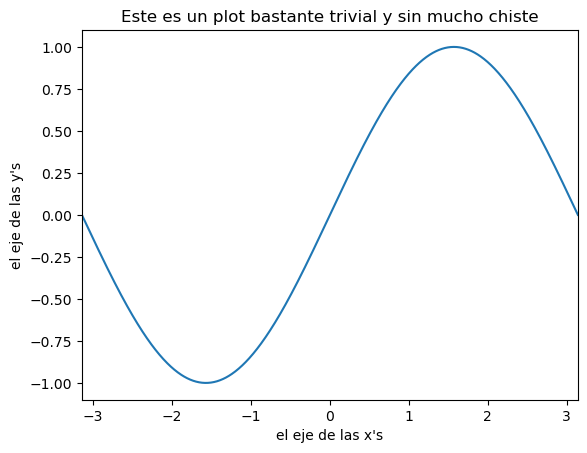

In [42]:
# Vamos a hacerlo pasito a pasito

# Primero obtenemos un vector x
x = np.linspace(-np.pi, np.pi, 1000)

# Luego obtenemos un vector y bastante trivial
y = np.sin(x)

# Y ahora hacemos una gráfica bastante básica de x y y
plt.plot(x, y)
plt.xlabel("el eje de las x's")
plt.ylabel("el eje de las y's")
plt.title("Este es un plot bastante trivial y sin mucho chiste")

# Bueno como la gráfica no esta muy bien a lo mejor se ve mejor si modificamos los limites de los ejes
plt.axis([-3.1416, 3.1416, -1.1, 1.1])
plt.show()

Aunque a veces queremos hacer unas gráficas más bien indicativas por lo que un estilo más informal podría ser útil:


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

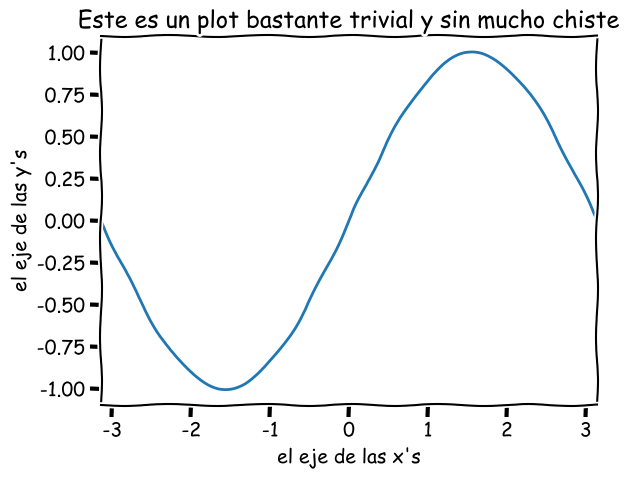

In [45]:
with plt.xkcd():
    plt.plot(x, y)
    plt.xlabel("el eje de las x's")
    plt.ylabel("el eje de las y's")
    plt.title("Este es un plot bastante trivial y sin mucho chiste")
    plt.axis([-3.1416, 3.1416, -1.1, 1.1])
    plt.show()

Hay que tener mucho cuidado, ya que si no se utiliza plt.xkcd() dentro de un with, entonces va a modificar todas las graficas que se realicen en la libreta (a veces es deseable, pero es una mejor práctica de programación hacerlo así).

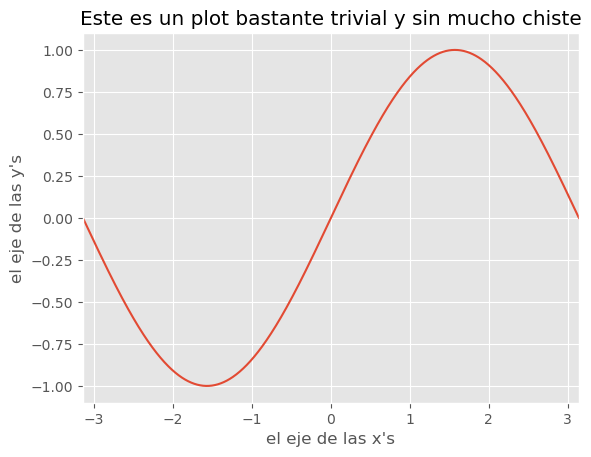

In [46]:
with plt.style.context(('ggplot')):
    plt.plot(x, y)
    plt.xlabel("el eje de las x's")
    plt.ylabel("el eje de las y's")
    plt.title("Este es un plot bastante trivial y sin mucho chiste")
    plt.axis([-3.1416, 3.1416, -1.1, 1.1])
    plt.show()

Ahora hagamos una gráfica con varios valores diferentes

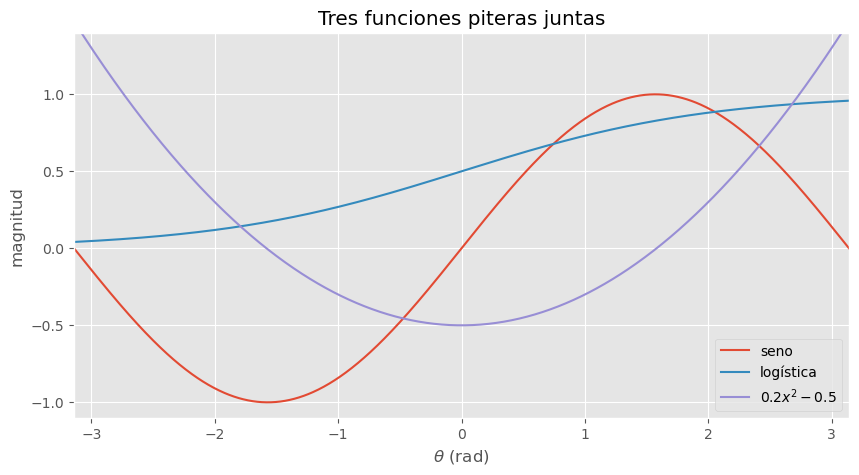

In [47]:
with plt.style.context(('ggplot')):

  fig = plt.figure(figsize=(10, 5))

  plt.plot(x, np.sin(x), label='seno')
  plt.plot(x, 1/(1 + np.exp(-x)), label=u"logística")
  plt.plot(x, (0.2 * x * x) - 0.5, label=r'$0.2 x^2 - 0.5$')

  plt.axis([-3.1416, 3.1416, -1.1, 1.4])

  plt.title("Tres funciones piteras juntas")
  plt.xlabel(r"$\theta$ (rad)")
  plt.ylabel("magnitud")

  plt.legend(loc=0)

  plt.show()

Hay muchos tipos de funciones, lo mejor para saber como utilizar matplotlib es ver la galería de ejemplos que se encuentran en la ayuda,
y pueden consultarse en https://matplotlib.org/stable/gallery/index.html (al darle click a una imagen se puede ver el código que la genera).

Por ejemplo si queremos una gráfica tipo pay:

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

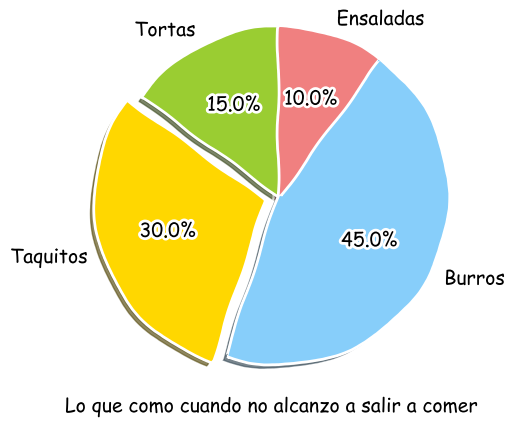

In [48]:
labels = 'Tortas', 'Taquitos', 'Burros', 'Ensaladas'
porcentajes = [15, 30, 45, 10]
colores = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
separa = (0, 0.1, 0, 0) # solo separa la segunda rebanada (i.e. 'Taquitos')

with plt.xkcd():
    plt.pie(porcentajes, explode=separa, labels=labels, colors=colores, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal') #Para que el pay se vea como un círculo
    plt.xlabel(u'Lo que como cuando no alcanzo a salir a comer')
    plt.show()


O si queremos una gráfica tipo contorno con todo y datos

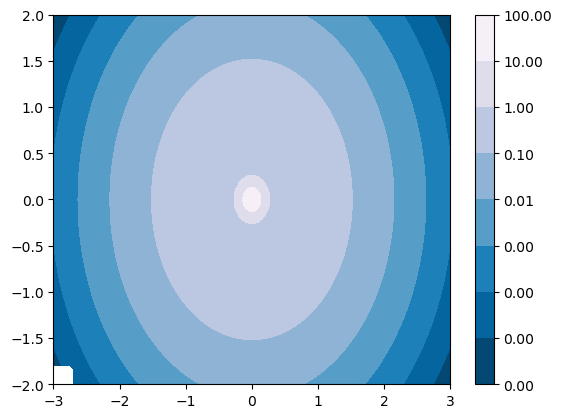

In [49]:
from matplotlib import ticker, cm

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

# Vamos a crear un valor de Z usando la suma de dos funciones
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
z = Z1 + 50 * Z2

# ponemos algunos puntos negativos para ver los problemas que pueden causar:
z[:5, :5] = -1

# Esta linea es para evitar un warning, pero se puede quitar para ver
# que avisa el sistema.
z = np.ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

# Tambien se pueden ajustar los niveles de forma manual
# levs = np.linspace(0, z.max(), 200)
# cs = ax.contourf(X, Y, z, levs)

cbar = fig.colorbar(cs)

plt.show()

Por último, un detalle muy importante y que puede ser de mucha utilidad: La generación de subplots. Una figura puede contener varias subgraficas, para esto hay que especificar en cuantas gráficas vamos a dividir la figura en forma de renglones y columnas, y luego seleccionar la subgráfica en la que vamos a graficar. Por ejemplo

    plt.subplot(2,2,1)
    
significa que la figura la vamos a dividir en 2 renglones y dos columnas (cuatro subgráficas) y vamos a escribir sobre la subgráfica 1. Lo mejor es ilustrarlo con un ejemplo muy simple.

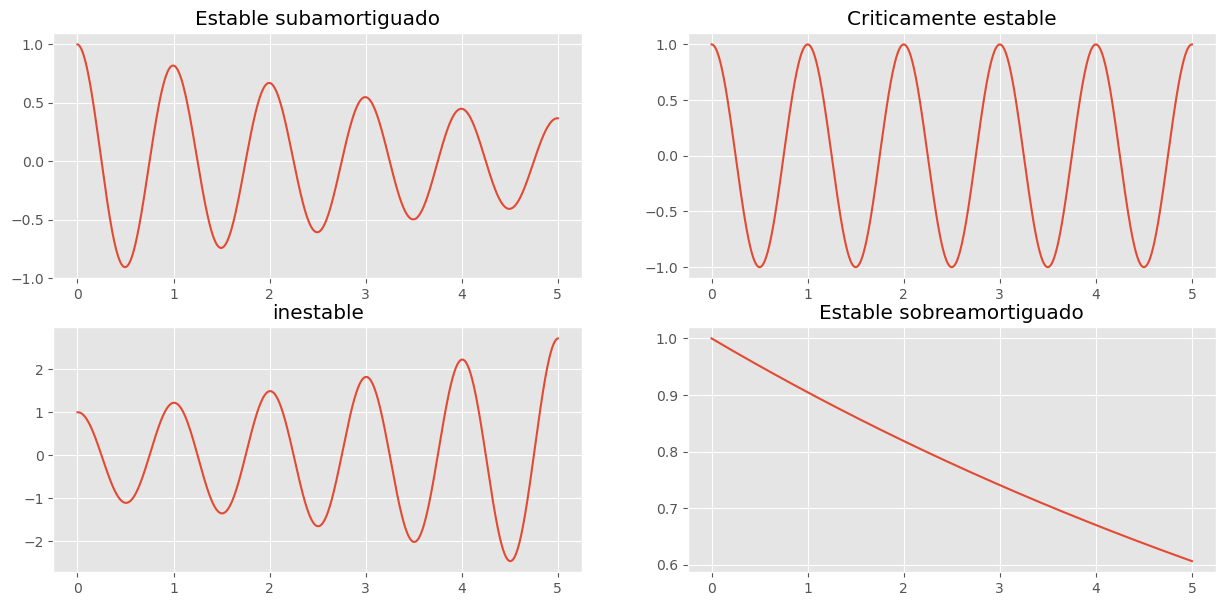

In [50]:
x = np.linspace(0, 5, 1000)
y1 = np.exp(-0.2 * x) * np.cos(2 * np.pi * x)
y2 = np.cos(2 * np.pi * x)
y3 = np.exp(0.2 * x) * np.cos(2 * np.pi * x)
y4 = np.exp(-0.1 * x)

with plt.style.context(('ggplot')):
  plt.figure(figsize=(15,7))

  plt.subplot(2, 2, 1)
  plt.plot(x, y1)
  plt.title('Estable subamortiguado')

  plt.subplot(2, 2, 2)
  plt.plot(x, y2)
  plt.title('Criticamente estable')

  plt.subplot(2, 2, 3)
  plt.plot(x, y3)
  plt.title('inestable')

  plt.subplot(2, 2, 4)
  plt.plot(x, y4)
  plt.title('Estable sobreamortiguado')
  
  plt.show()

### Practiquemos haciendo algunas gráficas

Realiza lo siguiente en varias celdas abajo de esta:

1. Genera un vector de 1000 datos aleatorios distribuidos de acuerdo a una gaussiana con media 3 y varianza .5, y otro vector con 1000 datos aleatorios distribuidos con una media 0 y una varianza unitaria. Al concatenar los dos vectores, estás generando una serie de datos proveniente de una distribución conocida como suma de gaussianas. Para ver como es esta distribución de datos, realiza un histograma (con un número suficiente de bins).

2. Genera un vector de datos de entrada `x = np.linspace(0, 1, 1000)` y grafica $\sin(2\pi x)$, $\sin(4\pi x)$, $\sin(8\pi x)$. ¿Que conlusión puedes sacar al respecto? Realiza la gráfica con titulo, ejes, etiquetas y todo lo necesario para que sea publicable.

3. Grafíca la función $e^{-t}\cos(2\pi t)$ para $t \in [0, 5]$. Asegurate que la gráfica sea una linea punteada de color rojo, que la gráfica tenga título, etiqueta en el eje de $t$ (tiempo), etiqueta en el eje de $y$ (voltaje en $\mu V$), y una nota donde se escriba la ecuación simulada.

4. Copia un ejemplo de la galería de matplotlib (por ejemplo [este](https://matplotlib.org/stable/gallery/lines_bars_and_markers/spectrum_demo.html#sphx-glr-gallery-lines-bars-and-markers-spectrum-demo-py) o [este](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py), o [este inclusive](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py)) y modificalo para que se grafique dentro de la libreta. Una vez funcionando, comenta el código, dejando bien claro **en español y con tus palabras** que es lo que hace cada una de las lineas.

In [ ]:
#Agrega aqui el primer problema y resuelve cada problema en una celda independiente.